# Escuela Politécnica Nacional

![](logoEpn.jpg){width=3cm height=3cm fig-align="center"}

# Eliminación Gaussiana con sustitución hacia atrás

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[1, 1, 0, 3, 4], [2, 1, -1, 1, 1], [3, -1, -1, 2, -3], [-1, 2, 3, -1, 4]]

eliminacion_gaussiana(Ab)

[12-26 01:40:20][INFO] 2025-12-26 01:40:20.986244
[12-26 01:40:23][INFO] 
[[  1   1   0   3   4]
 [  0  -1  -1  -5  -7]
 [  0  -4  -1  -7 -15]
 [  0   3   3   2   8]]
[12-26 01:40:23][INFO] 
[[  1   1   0   3   4]
 [  0  -1  -1  -5  -7]
 [  0   0   3  13  13]
 [  0   0   0 -13 -13]]
[12-26 01:40:23][INFO] 
[[  1   1   0   3   4]
 [  0  -1  -1  -5  -7]
 [  0   0   3  13  13]
 [  0   0   0 -13 -13]]


array([-1.,  2.,  0.,  1.])

In [3]:
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[1, -1, 2, -1, -8], [2, -2, 3, -3, -20], [1, 1, 1, 0, -2], [1, -1, 4, 3, 4]]

eliminacion_gaussiana(Ab)

[12-26 01:40:41][INFO] 
[[ 1 -1  2 -1 -8]
 [ 0  0 -1 -1 -4]
 [ 0  2 -1  1  6]
 [ 0  0  2  4 12]]
[12-26 01:40:41][INFO] 
[[ 1 -1  2 -1 -8]
 [ 0  2 -1  1  6]
 [ 0  0 -1 -1 -4]
 [ 0  0  2  4 12]]
[12-26 01:40:41][INFO] 
[[ 1 -1  2 -1 -8]
 [ 0  2 -1  1  6]
 [ 0  0 -1 -1 -4]
 [ 0  0  0  2  4]]


array([-7.,  3.,  2.,  2.])

# Soluciones infinitas
El siguiente sistema de ecuaciones tiene soluciones infinitas:

|   |   |   |   |
|---|---|---|---|
| 1 | 1 | 1 | 4 |
| 2 | 2 | 1 | 6 |
| 1 | 1 | 2 | 6 |

In [ ]:
# %load_ext autoreload
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[1, 1, 1, 4], [2, 2, 1, 6], [1, 1, 2, 6]]

eliminacion_gaussiana(Ab)

[12-26 01:41:08][INFO] 
[[ 1  1  1  4]
 [ 0  0 -1 -2]
 [ 0  0  1  2]]


ValueError: No existe solución única.

## Complejidad Computacional del método de Eliminación Gaussiana vs. Gauss-Jordan

In [29]:
def gauss_jordan_complex(n: float) -> float:
    # Mult/div
    return n**3 / 2 + n**2 - n / 2

def gauss_jordan_sumas_restas(n: float) -> float:
    # Sumas_restas
    return n**3 / 2 - n / 2
   
def eliminacion_gaussiana_complex(n: float) -> float:
    # Mult/div
    return n**3 / 3 + n**2 - n / 3

def eliminacion_gaussiana_sumas_restas(n: float) -> float:
    # Sumas_restas
    return n**3 / 3 + n**2 / 2 - 5 * n / 6

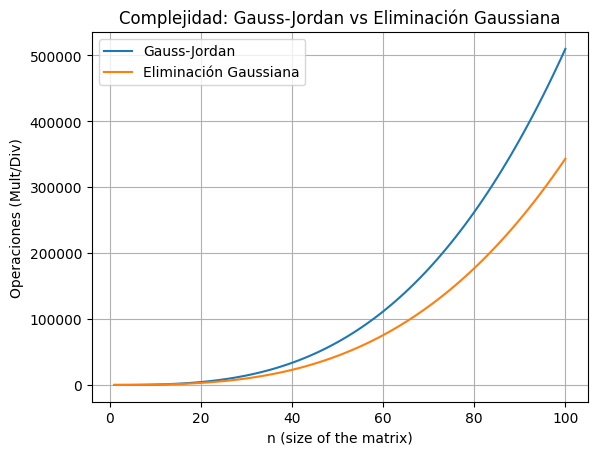

In [7]:
# plot gauss_jordan_complex and eliminacion_gaussiana_complex

import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(1, 100, 100)
gauss_jordan = [gauss_jordan_complex(x) for x in n]
eliminacion_gaussiana = [eliminacion_gaussiana_complex(x) for x in n]
plt.plot(n, gauss_jordan, label='Gauss-Jordan')
plt.plot(n, eliminacion_gaussiana, label='Eliminación Gaussiana')
plt.xlabel('n (size of the matrix)')
plt.ylabel('Operaciones (Mult/Div)')
plt.legend()
plt.title('Complejidad: Gauss-Jordan vs Eliminación Gaussiana')
plt.grid(True)
plt.show()

# Sin solución
El siguiente sistema de ecuaciones no tiene solución:

|   |   |   |   |
|---|---|---|---|
| 1 | 1 | 1 | 4 |
| 2 | 2 | 1 | 4 |
| 1 | 1 | 2 | 6 |

## Implementación del conteo de sumas y restas (y mult/div) para ambos métodos

In [ ]:
import numpy as np

def eliminacion_gaussiana_contada(A):
    A = np.array(A, dtype=float)
    n = A.shape[0]

    cont_sum = 0
    cont_mult = 0
    cont_div = 0
    cont_swap = 0

    for i in range(n - 1):

        # Pivote 
        p = None
        for pi in range(i, n):
            if A[pi, i] == 0:
                continue
            if p is None:
                p = pi
                continue
            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            raise ValueError("No existe solución única.")

        if p != i:
            A[[i, p]] = A[[p, i]]
            cont_swap += 1

        # Eliminación
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            cont_div += 1

            A[j, i:] = A[j, i:] - m * A[i, i:]
            cont_mult += (n - i)
            cont_sum += (n - i)

    return cont_div, cont_mult, cont_sum, cont_swap

## Determinar el número de intercambios de filas usando el código base

In [45]:
def eliminacion_gaussiana_swaps(A):
    A = np.array(A, dtype=float)
    n = A.shape[0]
    swaps = []

    for i in range(n - 1):
        p = None
        for pi in range(i, n):
            if A[pi, i] == 0:
                continue
            if p is None or abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            raise ValueError("No existe solución única.")

        if p != i:
            swaps.append((i, p))
            A[[i, p]] = A[[p, i]]

        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] -= m * A[i, i:]

    return swaps

## Determinar el número de mult/div y sumas/restas usando el código base, crear varios sistemas de ecuaciones y comprobar con la expresión analítica la complejidad del método

In [46]:
import numpy as np

def sistema_random(n): # Genera un sistema aleatorio de tamaño n x (n+1)
    A = np.random.rand(n, n)
    b = np.random.rand(n, 1)
    return np.hstack((A, b))

In [47]:
ns = [5, 10, 20, 50, 100] # Tamaños de los sistemas
resultados = []

for n in ns:
    Ab = sistema_random(n)
    divs, mults, sums, swaps = eliminacion_gaussiana_contada(Ab)
    resultados.append([n, divs, mults, sums, swaps])

In [ ]:
import pandas as pd

df = pd.DataFrame(
    resultados,
    columns=["n", "divisiones", "multiplicaciones", "sumas_restas", "swaps"]
)

df # Mostrar resultados

,n,divisiones,multiplicaciones,sumas_restas,swaps
0,5,10,40,40,3
1,10,45,330,330,8
2,20,190,2660,2660,17
3,50,1225,41650,41650,47
4,100,4950,333300,333300,94


In [49]:
def gauss_teorico(n): # Complejidad teórica de la eliminación gaussiana
    return (1/3) * n**3

In [50]:
df["mults / n^3"] = df["multiplicaciones"] / df["n"]**3
df["sums / n^3"] = df["sumas_restas"] / df["n"]**3

df

,n,divisiones,multiplicaciones,sumas_restas,swaps,mults / n^3,sums / n^3
0,5,10,40,40,3,0.3200,0.3200
1,10,45,330,330,8,0.3300,0.3300
2,20,190,2660,2660,17,0.3325,0.3325
3,50,1225,41650,41650,47,0.3332,0.3332
4,100,4950,333300,333300,94,0.3333,0.3333


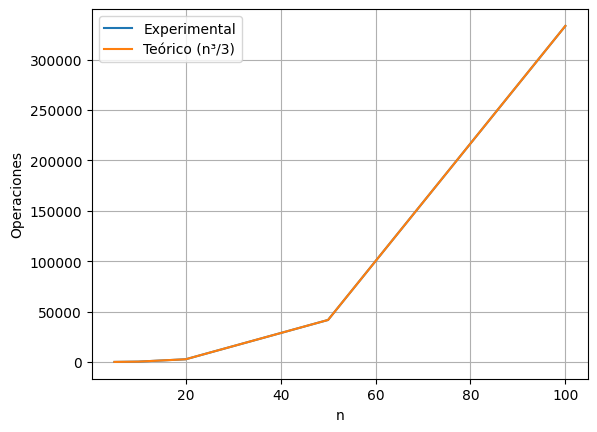

In [51]:
import matplotlib.pyplot as plt

plt.plot(df["n"], df["multiplicaciones"], label="Experimental")
plt.plot(df["n"], gauss_teorico(df["n"]), label="Teórico (n³/3)")
plt.xlabel("n")
plt.ylabel("Operaciones")
plt.legend()
plt.grid(True)
plt.show()

# **Ejercicio 1**

In [52]:
# %load_ext autoreload
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[1, 1, 1, 4], [2, 2, 1, 4], [1, 1, 2, 6]]

eliminacion_gaussiana(Ab)

[12-26 13:18:53][INFO] 
[[ 1.  1.  1.  4.]
 [ 0.  0. -1. -4.]
 [ 0.  0.  1.  2.]]


ValueError: No existe solución única.

Respuesta: **Sin solución**

# **Ejercicio 2**

In [ ]:
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[4., 1, 2, 9], [2, 4, -1, -5], [1, 1, -3, -9]]

eliminacion_gaussiana(Ab)

[12-26 13:03:49][INFO] 
[[ 1.  1. -3. -9.]
 [ 0.  2.  5. 13.]
 [ 0. -3. 14. 45.]]
[12-26 13:03:49][INFO] 
[[ 1.   1.  -3.  -9. ]
 [ 0.   2.   5.  13. ]
 [ 0.   0.  21.5 64.5]]


array([ 1., -1.,  3.])

Respuesta:
**El código funciona correctamente y se llega a la solución correcta**


# **Ejercicio 3**

In [ ]:
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[2., 1, -1, 1, -3, 7], [1, 0, 2, -1, 1, 2], [0, -2, -1, 1, -1, -5], [3, 1, -4, 0, 5, 6], [1, -1, -1, -1, 1, 3]]

eliminacion_gaussiana(Ab)

[12-26 13:04:39][INFO] 
[[  1.   0.   2.  -1.   1.   2.]
 [  0.   1.  -5.   3.  -5.   3.]
 [  0.  -2.  -1.   1.  -1.  -5.]
 [  0.   1. -10.   3.   2.   0.]
 [  0.  -1.  -3.   0.   0.   1.]]
[12-26 13:04:39][INFO] 
[[  1.   0.   2.  -1.   1.   2.]
 [  0.   1.  -5.   3.  -5.   3.]
 [  0.   0. -11.   7. -11.   1.]
 [  0.   0.  -5.   0.   7.  -3.]
 [  0.   0.  -8.   3.  -5.   4.]]
[12-26 13:04:39][INFO] 
[[  1.    0.    2.   -1.    1.    2. ]
 [  0.    1.   -5.    3.   -5.    3. ]
 [  0.    0.   -5.    0.    7.   -3. ]
 [  0.    0.    0.    7.  -26.4   7.6]
 [  0.    0.    0.    3.  -16.2   8.8]]
[12-26 13:04:39][INFO] 
[[  1.           0.           2.          -1.           1.
    2.        ]
 [  0.           1.          -5.           3.          -5.
    3.        ]
 [  0.           0.          -5.           0.           7.
   -3.        ]
 [  0.           0.           0.           3.         -16.2
    8.8       ]
 [  0.           0.           0.           0.          11.4
  -12.93333333]

array([ 1.91812865,  1.96491228, -0.98830409, -3.19298246, -1.13450292])

In [ ]:
swaps = eliminacion_gaussiana_swaps(Ab)
print("Intercambios:", swaps)

Intercambios: [(0, 1), (2, 3), (3, 4)]


## Link del repositorio GitHub

[github_TamyBenavidez](https://github.com/TamyBenavidez/MN/tree/main/Taller/Taller-Gauss/taller-gauss-main), Taller Eliminación Gaussiana